In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
class PCA:
    
    def __init__(self, n_component, solver="svd"):
        self.n_component = n_component
        self.solver=solver
        self.components = None
        self.mean = None
        
        
    def fit(self, X):
        self.mean = X.mean(axis=0)
        X = X - self.mean
        
        # expects row=feature, column=sample          
        # cov = np.cov(X.T)
        cov = (X - X.mean(axis=0)).T.dot(X - X.mean(axis=0)) / (X.shape[0] - 1)
                
        
        if self.solver == "eig":
            #  eigenvalue[i] -> eigenvector[:, i]
            eigenvalues, eigenvectors = np.linalg.eig(cov)
            
            eigenvectors = eigenvectors.T
            
            idxs = np.argsort(eigenvalues)[::-1]
            eigenvalues = eigenvalues[idxs]
            eigenvectors = eigenvectors[idxs]
            
            self.components = eigenvectors[0:self.n_component]
        
        
        else:          
            # SVD
            _, S, Vt = np.linalg.svd(X)
            idxs = np.argsort(S)[::-1]
            
            S = S[idxs]
            Vt = Vt[idxs]
            
            self.components = Vt[0:self.n_component]
        
    
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [17]:
data = load_iris()
X = data.data
y = data.target

In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
X.shape, y.shape

((150, 4), (150,))

In [21]:
pca = PCA(n_component=2)
X_projected = pca.fit_transform(X)

In [22]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

In [23]:
X_trans = np.c_[x1, x2, y]
X_trans.shape

(150, 3)

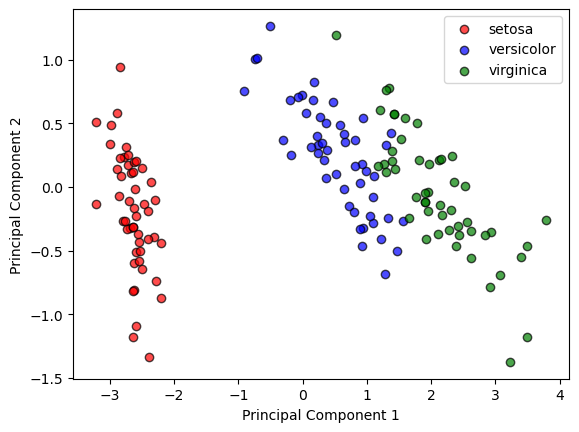

In [24]:
colors = ["red", "blue", "green"]
for i in range(3):
    plt.scatter(X_trans[X_trans[:, 2] == i][:, 0], X_trans[X_trans[:, 2] == i][:, 1], c=colors[i], 
                edgecolors="k", alpha=0.7, label=data.target_names[i])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()